# Tomography/Laminography Reconstruction

This notebook demonstrates a simulated tomography/laminography reconstruction using tike. Since laminography is just a specific case of tomography, one example should be sufficient.

In [1]:
import logging
import lzma
import pickle

import matplotlib.pyplot as plt
import numpy as np

import tike.lamino
import tike.view

In [2]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.15.2.dev39+g7ca618d.d20210126
numpy is version 1.19.5


## Create test data

### Define the object

In [3]:
with lzma.open('../../../tests/data/nalm256.pickle.lzma', 'rb') as file:
    original = pickle.load(file)[::2, ::2, ::2].astype('complex64')
original.shape

(128, 128, 128)

In [4]:
# Mark object to make it asymmetric
original[20:25, 60:64, 20:25] = 0.001

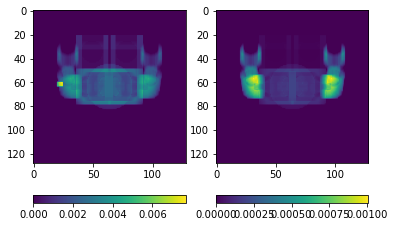

In [5]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=0))
plt.show()

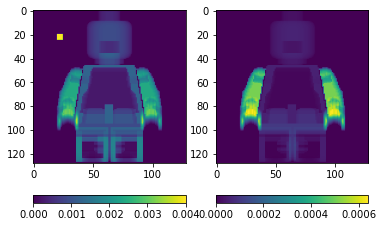

In [6]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=1))
plt.show()

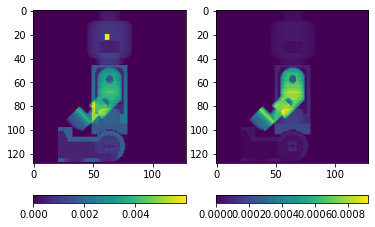

In [7]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=2))
plt.show()

### Define trajectory

In [8]:
theta = np.linspace(0, np.pi, 128, endpoint=False, dtype='float32')
theta.shape

(128,)

## Simulate data acquisition

In [9]:
tilt=np.pi/2
data = tike.lamino.simulate(obj=original, theta=theta, tilt=tilt)

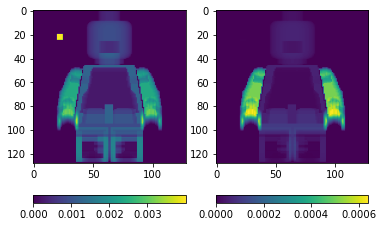

In [10]:
plt.figure()
tike.view.plot_complex(data[0])
plt.show()

## Reconstruct the data

In [11]:
logging.basicConfig(level=logging.INFO)
result = {
    'obj': np.zeros(original.shape, dtype='complex64')
}

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:Estimate step length from forward adjoint operations.
INFO:tike.opt:line_search: 0 backtracks; 1.000e+00 -> 1.000e+00; cost 1.591542e+00
INFO:tike.opt:line_search: 0 backtracks; 1.000e+00 -> 1.000e+00; cost 5.836657e-01
INFO:tike.opt:line_search: 0 backtracks; 1.000e+00 -> 1.000e+00; cost 5.836524e-01
INFO:tike.opt:line_search: 0 backtracks; 1.000e+00 -> 1.000e+00; cost 1.908309e-01
INFO:tike.lamino.solvers.cgrad:    object cost is +1.90831e-01
INFO:tike.lamino.solvers.cgrad:Estimate step length from forward adjoint operations.
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.566347e-01
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 9.627850e-02
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 7.772186e-02
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 5.909871e-02
INFO:tike.lamino.solvers.cg

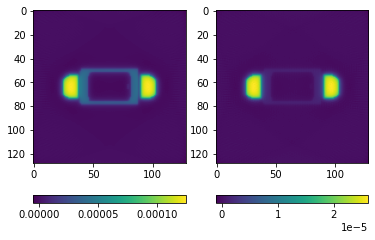

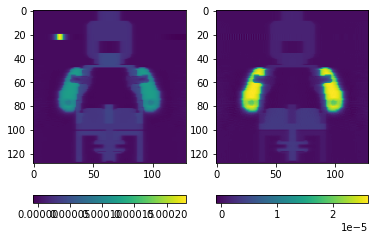

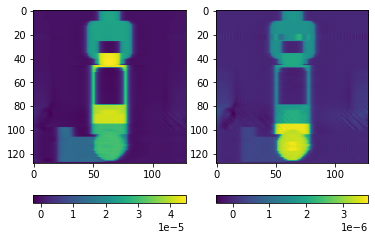

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.546917e-02
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.427541e-02
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.284465e-02
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.125180e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +1.12518e-02
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.028463e-02
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 8.848310e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 8.371785e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 6.706986e-03
INFO:tike.lamino.solvers.cgrad:    object cost is +6.70699e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 5.498258e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 

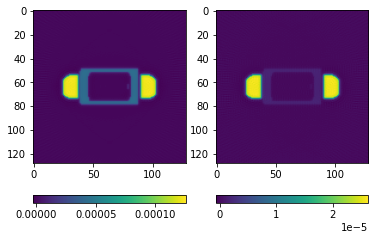

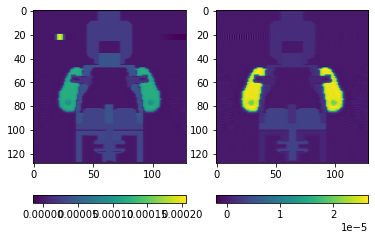

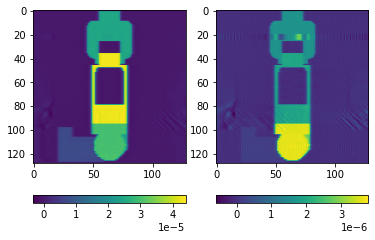

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.935811e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.771729e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.600668e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.432635e-03
INFO:tike.lamino.solvers.cgrad:    object cost is +2.43264e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.317104e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.096016e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.013589e-03
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 9.717180e-04
INFO:tike.lamino.solvers.cgrad:    object cost is +9.71718e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 6.740721e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 

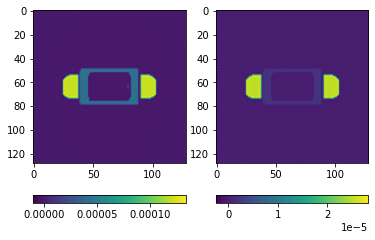

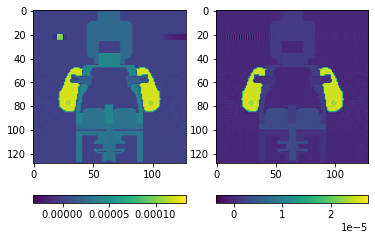

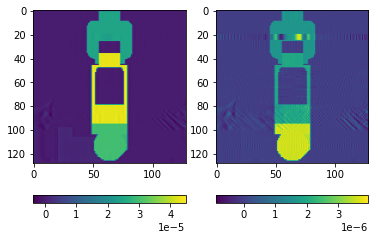

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.318308e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.201903e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.079567e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 2.023986e-04
INFO:tike.lamino.solvers.cgrad:    object cost is +2.02399e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.985125e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.827621e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.741439e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.393378e-04
INFO:tike.lamino.solvers.cgrad:    object cost is +1.39338e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 1.124756e-04
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 

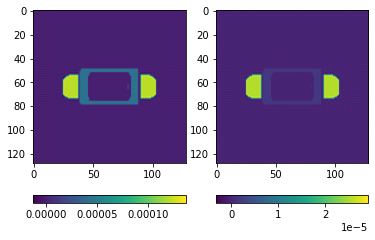

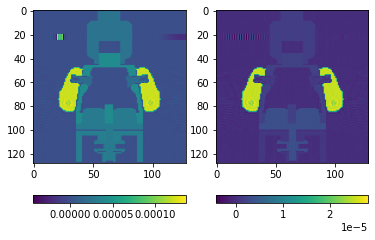

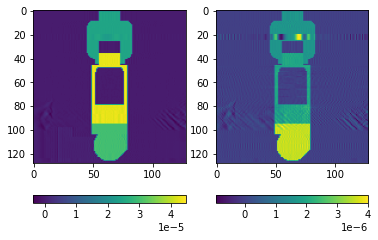

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 6.627871e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 6.390986e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 6.122344e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 5.957991e-05
INFO:tike.lamino.solvers.cgrad:    object cost is +5.95799e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 5.842850e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 5.495198e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 5.301681e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 4.691230e-05
INFO:tike.lamino.solvers.cgrad:    object cost is +4.69123e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 -> 1.610e+04; cost 4.158177e-05
INFO:tike.opt:line_search: 0 backtracks; 1.610e+04 

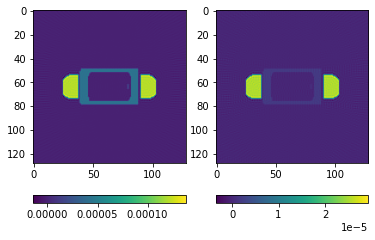

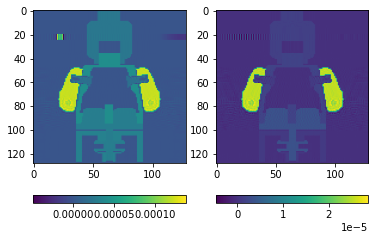

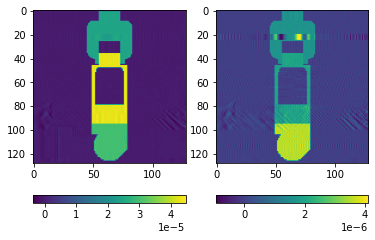

In [12]:
for i in range(5):
    result = tike.lamino.reconstruct(
        **result,
        theta=theta,
        data=data,
        algorithm='cgrad',
        num_iter=4,
        tilt=tilt,
    )
    plt.figure()
    tike.view.plot_complex(result['obj'][64])
    plt.show()
    plt.figure()
    tike.view.plot_complex(result['obj'][:, 64])
    plt.show()
    plt.figure()
    tike.view.plot_complex(result['obj'][:, :, 64])
    plt.show()